## Overview

- Tetris game rule: https://tetris.wiki/Tetris_Guideline
- Deep Q-learning example, has code and some useful resources: https://github.com/nuno-faria/tetris-ai?tab=readme-ov-file
- Deep Q-learning example, has code: https://github.com/vietnh1009/Tetris-deep-Q-learning-pytorch
- Q-learning example, but simplified Tetris, has code and write-up: https://timhanewich.medium.com/how-i-trained-a-neural-network-to-play-tetris-using-reinforcement-learning-ecfa529c767a
- Q-learning paper, has pseudo-algo: https://openreview.net/pdf?id=8TLyqLGQ7Tg
- Deep Q Learning code mentioned in class: https://github.com/keon/deep-q-learning/blob/master/dqn.py

Roadmap:
1. ~~Develop human-playable Tetris~~
2. ~~Create an interface between the game and learning agent~~
3. ~~Try basic Tabular Q-Learning with a smaller board~~
4. Try feature-based state Tabular Q-learning
4. Deep Q-Network
5. Train the agent over many episodes
6. Evaluation, Visualization, Paper-writing




## Developing the Game

In [4]:
%load_ext autoreload
%autoreload 2

import TetrisGame
import time
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
"""Return mean micro-seconds per `(get_valid_actions + update_board)` step."""

steps = 1000
game = TetrisGame.TetrisGame()                       # relies on your new constructor

timings_ns = 0
for _ in range(steps):
    game.spawn_new_piece()
    t0 = time.perf_counter_ns()
    actions = game.get_valid_actions()
    if not actions:                              # game over – reset board
        game.reset_board()
        continue
    rot_idx, x = random.choice(actions)
    info = game.update_board(rot_idx, x)
    timings_ns += time.perf_counter_ns() - t0
    # skip rendering / line-clear data in `info`
    game.check_game_over()
    if game.game_over:
        game.reset_board()

print(timings_ns / steps / 1_000)  # µs per step


2532.0982999999997


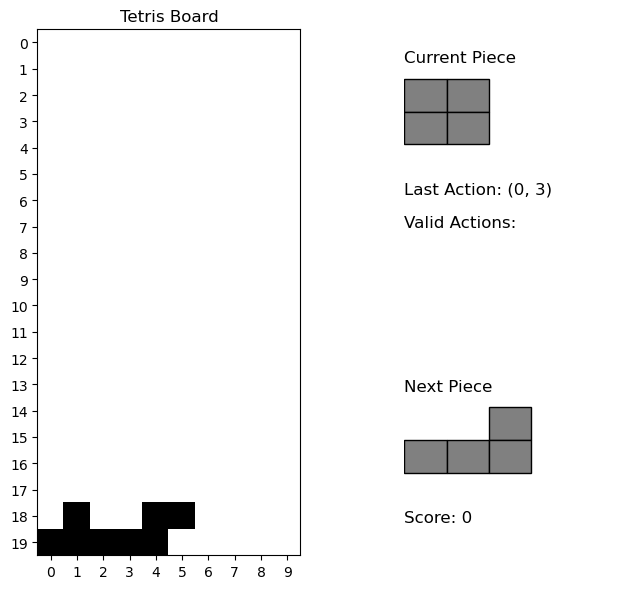

Final score: 0


In [17]:
game = TetrisGame.TetrisGame()
game.play()

In [39]:
game = TetrisGame.TetrisGame()

In [40]:
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
game.spawn_new_piece()          

In [42]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [43]:
game.next_piece

('L',
 [array([[0, 0, 1],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 0],
         [1, 1]]),
  array([[1, 1, 1],
         [1, 0, 0]]),
  array([[1, 1],
         [0, 1],
         [0, 1]])])

In [45]:
valid = game.get_valid_actions()    
valid

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

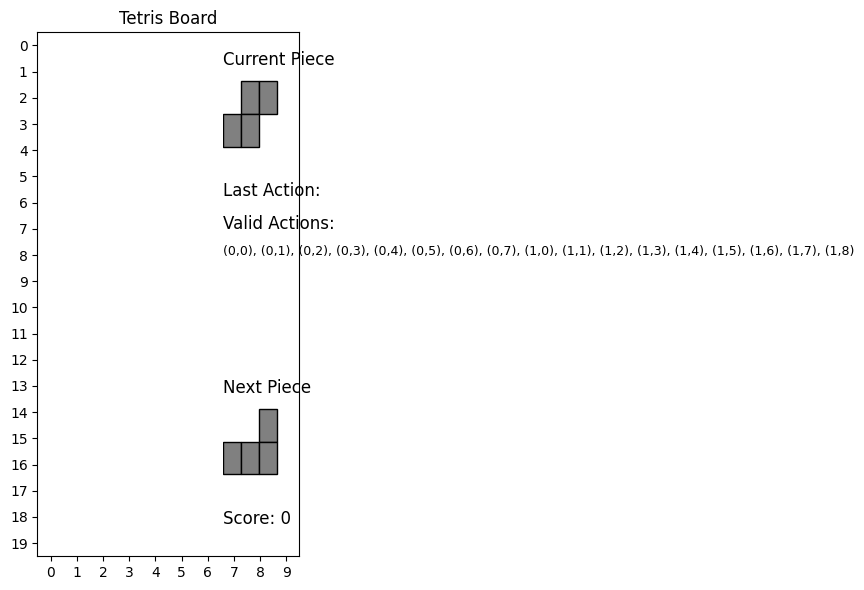

In [47]:
game.render(valid)

In [16]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [19]:
game.next_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

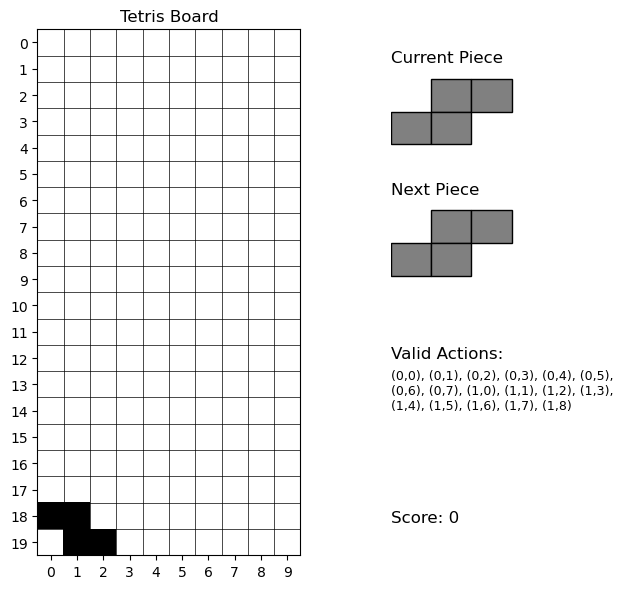

In [28]:
game.render(game.get_valid_actions())

In [29]:
game.player_input(game.get_valid_actions())

Not a valid pair; pick from the valid actions list.


(0, 0)

In [21]:
game.get_valid_actions()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

In [11]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
print(game.game_over, game.score)

True 0


## Developing the Gym

In [50]:
%load_ext autoreload
%autoreload 2

import TetrisGame
import TetrisGym

import numpy as np
from collections import defaultdict
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
gym = TetrisGym.TetrisGym()

In [52]:
gym.game.current_piece

('Z',
 [array([[1, 1, 0],
         [0, 1, 1]]),
  array([[0, 1],
         [1, 1],
         [1, 0]])])

In [53]:
print(gym.state_mode)
gym.get_state()

flat


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.])

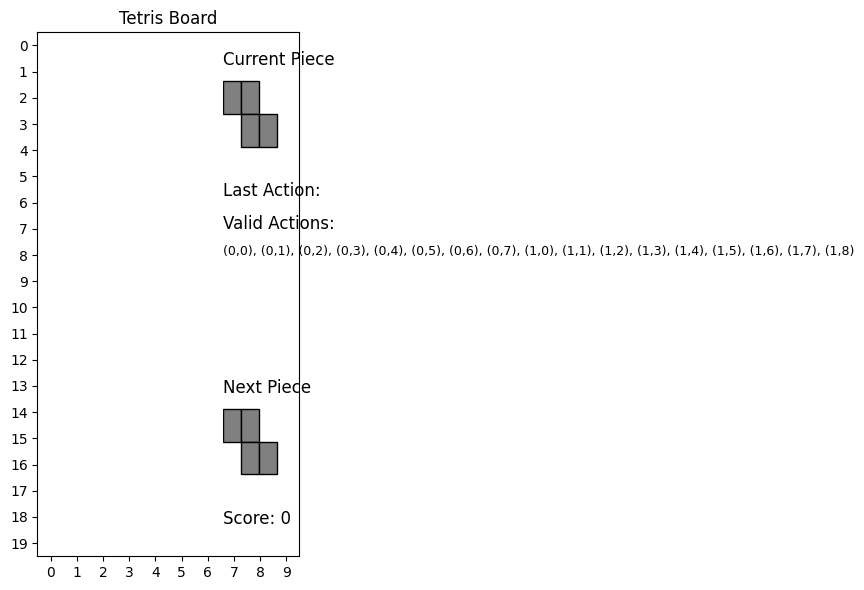

In [54]:
gym.render()

In [55]:
gym.get_valid_action_ids()

[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [56]:
"""
Rought draft of a Q-table learning
"""

env = TetrisGym.TetrisGym(max_steps=100)
epsilon = np.inf
Q   = defaultdict(lambda: np.zeros(env.get_action_space_size()))

for episode in range(1):
    state = env.reset()
    done  = False

    while not done:
        valid_ids = env.get_valid_action_ids()
        print(valid_ids)
        if np.random.rand() < epsilon:  # epsilon‑greedy over ONLY legal actions
            action_id = np.random.choice(valid_ids)
        else:
            q_vals    = Q[state][valid_ids]         # mask
            action_id = valid_ids[np.argmax(q_vals)]

        action_id = valid_ids[0]

        next_state, reward, done, _ = env.step(action_id)

        # Q‑update
        # best_next = np.max(Q[next_state]) if not done else 0
        # Q[state][action_id] += alpha * (reward + gamma * best_next - Q[state][action_id])

        state = next_state


[0, 1, 2, 3, 4, 5, 6, 17, 35]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34]


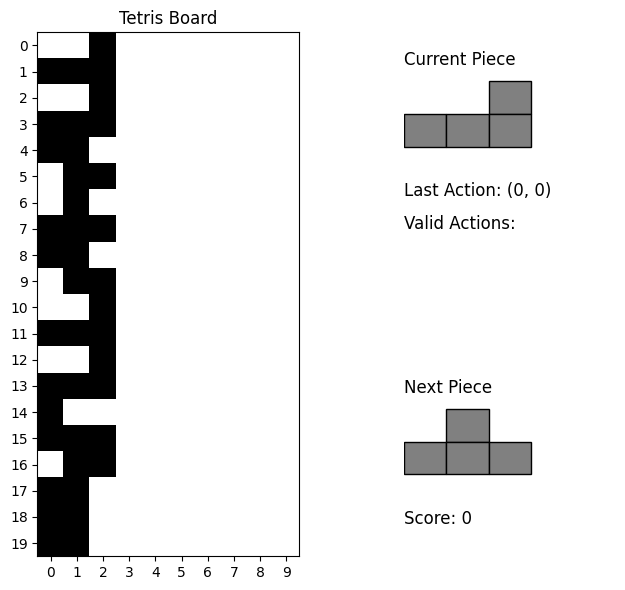

In [57]:
env.game.render(valid_actions=[])

In [58]:
gym = TetrisGym.TetrisGym(state_mode='tensor')
gym.get_state()[6]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
gym.game.current_piece

('T',
 [array([[0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 1],
         [1, 0]]),
  array([[1, 1, 1],
         [0, 1, 0]]),
  array([[0, 1],
         [1, 1],
         [0, 1]])])

## Developing Features

In [83]:
test_board = np.array(
    [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
     [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
     [0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
     [0., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
     [1., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
def _height_features(board):
    h, _ = board.shape
    mask = (board != 0)  # mask for filled cells
    filled_rows = np.argmax(mask, axis=0)  # first filled row per column, i.e. max height of each col
    empty_cols = ~np.any(mask, axis=0)
    filled_rows[empty_cols] = h  # if column empty, treat as full height from bottom

    col_heights = h - filled_rows  # vector of shape (w,)
    abs_height_diff = np.abs(np.diff(col_heights))
    print(col_heights)

    max_height = float(np.max(col_heights))
    min_height = float(np.min(col_heights))
    total_height = float(np.sum(col_heights))
    max_bumpiness = float(np.max(abs_height_diff))
    total_bumpiness = float(np.sum(abs_height_diff))
    return max_height, min_height, total_height, max_bumpiness, total_bumpiness

In [72]:
_height_features(test_board)

[2 5 3 3 1 1 1 1 1 6]


(6.0, 1.0, 24.0, 5.0, 12.0)

In [33]:
%timeit _max_height(test_board)

26.7 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [88]:
def count_holes(board: np.ndarray) -> int:
    """
    A hole is defined as an empty space such that there is at least one tile in the same column above it.
    board : np.ndarray of shape (H, W) with 1 = filled, 0 = empty
    """
    filled = board != 0                       # bool mask of filled cells
    # cumulative OR of 'filled' down each column
    accum_filled = np.maximum.accumulate(filled, axis=0)
    holes = (~filled) & accum_filled            # empty cells that have a block above
    return int(holes.sum())

In [90]:
count_holes(test_board)

4

In [89]:
%timeit count_holes(test_board)

9.17 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Tabular Q-learning

To do tabular Q-learning, we will have to maintain a Q-value for each state-action pair. But a standard Tetris Board has 10x20 rows, which amounts to **2^200** board configurations, even if not all of them are possible, it's still a lot. So we first go ahead and try out a smaller board.

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from TetrisGym import TetrisGym
from tabular_q import TabularQAgent

### Training (Start Fresh)

In [2]:
"""Q-learning parameters"""
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.99995

NUM_EPISODES = 1_000_000 #1_000_000
MAX_STEPS = 100

In [3]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = TabularQAgent(board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
                      alpha=ALPHA, gamma=GAMMA,
                      eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY)

In [4]:
agent.train(env, episodes=NUM_EPISODES, max_steps=100)

Tab-Q | mu_100=5.5 epsilon=0.01: 100%|██████████| 1000000/1000000 [1:13:11<00:00, 227.73it/s]


In [5]:
agent.save_agent(save_file="tabular_checkpoints/latest.pkl")

### Training (Start from agent)

In [6]:
"""Q-learning parameters"""
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

EPSILON = 1.0  # will be overwritten
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.99995

NUM_EPISODES = 10_000 #1_000_000
MAX_STEPS = 100

In [7]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = TabularQAgent(board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
                      alpha=ALPHA, gamma=GAMMA,
                      eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY)
agent.load_agent("tabular_checkpoints/latest.pkl")

In [8]:
agent.train(env, episodes=NUM_EPISODES, max_steps=100)

Tab-Q | mu_100=5.0 epsilon=0.37: 100%|██████████| 10000/10000 [00:46<00:00, 216.81it/s]


### Analysis

In [ ]:
with open("tabular_checkpoints/latest.pkl", "rb") as file:
    data = pickle.load(file)

rewards = data["rewards"]
scores = data['scores']

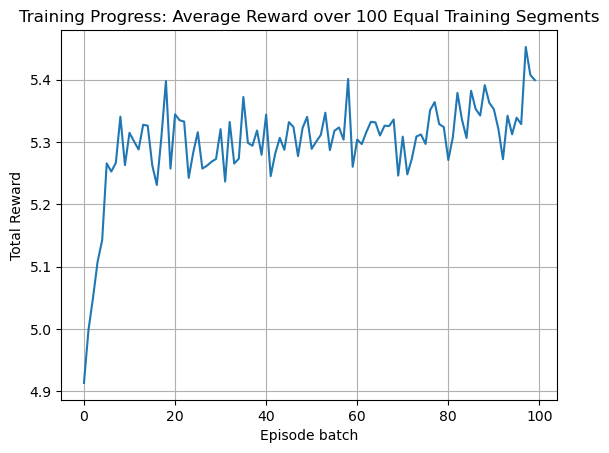

In [14]:
plt.plot(np.mean(np.array_split(rewards, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

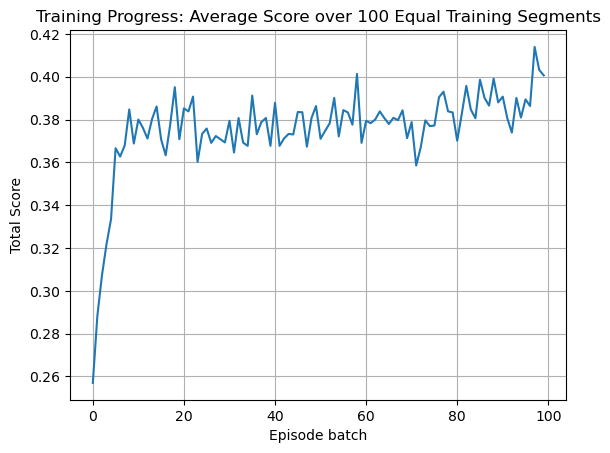

In [15]:
plt.plot(np.mean(np.array_split(scores, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [11]:
def evaluate_trained_policy(env, Q, num_episodes=1000):
    """Evaluate the policy with no exploration"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating trained policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            state_key = state.numpy().tobytes()
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            best_action = max(valid_actions, key=lambda a: Q[state_key][a])  # find action based on valid action and state
            state, reward, done, _ = env.step(best_action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

def evaluate_random_policy(env, num_episodes=1000):
    """A random agent for benchmark"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating random policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            action = random.choice(valid_actions)
            state, reward, done, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

In [12]:
env_trained = TetrisGym(width=6, height=6, state_mode='flat')
trained_Q = defaultdict(lambda: np.zeros(env_trained.get_action_space_size()), Q_table)  # defaultdict for agent access
greedy_rewards = evaluate_trained_policy(env_trained, trained_Q)

env_random = TetrisGym(width=6, height=6, state_mode='flat')
random_rewards = evaluate_random_policy(env_random)

Evaluating random policy: 100%|██████████| 1000/1000 [00:01<00:00, 952.80it/s]


In [13]:
def summarize_stats(name, rewards):
    rewards = np.array(rewards)
    print(f"{name} Agent:")
    print(f"  Mean reward:     {rewards.mean():.2f}")
    print(f"  Std deviation:   {rewards.std():.2f}")
    print(f"  Max reward:      {rewards.max()}")
    print(f"  Min reward:      {rewards.min()}")
    print()

summarize_stats("Greedy", greedy_rewards)
summarize_stats("Random", random_rewards)


Greedy Agent:
  Mean reward:     -7.36
  Std deviation:   2.85
  Max reward:      9.0
  Min reward:      -9.4

Random Agent:
  Mean reward:     -8.35
  Std deviation:   2.55
  Max reward:      10.2
  Min reward:      -9.600000000000001



In [18]:
"""Generates a gif of AI playing, also logs unvisted state"""

unexplored_states = set()
env_capture = TetrisGym(width=6, height=6, state_mode='flat', render_mode='capture')
trained_Q = defaultdict(lambda: np.zeros(env_capture.get_action_space_size()), Q_table)  # defaultdict for agent access
state_capture = env_capture.reset()
done = False
total_reward = 0
while not done:
    state_key = state_capture.numpy().tobytes()
    if state_key not in Q_table:
            unexplored_states.add(state_key)
    valid_actions = env_capture.get_valid_action_ids()
    if not valid_actions:
        break
    best_action = max(valid_actions, key=lambda a: trained_Q[state_key][a])  # find action based on valid action and state
    state_capture, reward, done, _ = env_capture.step(best_action)
    total_reward += reward
print("Total reward:", total_reward)
env_capture.save_gif("tetris_greedy.gif", fps=2)

Total reward: -6.800000000000001
GIF saved to tetris_greedy.gif


## CNN DQN

A DQN predicts the Q(s,a), without relying on maintaining the memory of the entire board. Here, a CNN is used to recognize the board.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from cnn_dqn import CNNAgent

In [2]:
print("CUDA available:", torch.cuda.is_available())
print("Torch CUDA version:", torch.version.cuda)

CUDA available: True
Torch CUDA version: 12.6


### Training (Start fresh)

In [10]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 10_000 # 1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 20_000  # size of memory to sample batches from
BATCH_SIZE = 32  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 10  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "cnn_dqn_checkpoints/latest.pth"

Using: cuda


In [4]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = CNNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)

In [13]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

DQN | mu_100=20.8 | epsilon=0.10: 100%|██████████| 10000/10000 [31:50<00:00,  5.23it/s]


In [14]:
agent.save_agent(SAVE_PATH)

### Training (Start from agent)

In [ ]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # will be updated when model is loaded
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 #1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 20_000  # size of memory to sample batches from
BATCH_SIZE = 32 # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 10  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
LOAD_PATH = "cnn_dqn_checkpoints/latest.pth"
SAVE_PATH = "cnn_dqn_checkpoints/latest.pth"

Using: cuda


In [10]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = CNNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)

In [28]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

DQN | mu_100=32.1 | epsilon=0.10: 100%|██████████| 10000/10000 [41:27<00:00,  4.02it/s]


In [29]:
agent.save_agent(SAVE_PATH)

### Analysis

In [8]:
len(agent.rewards)

10000

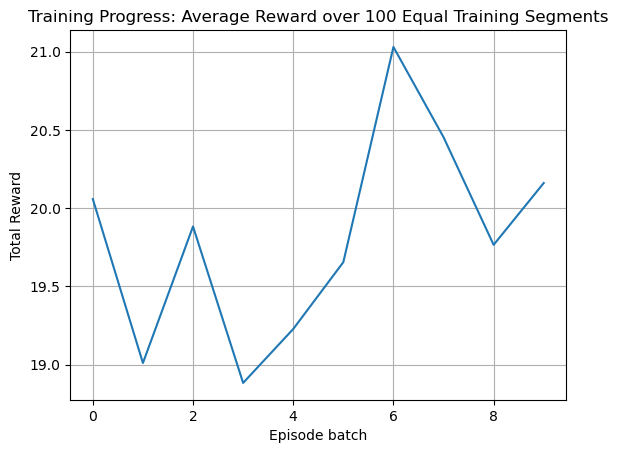

In [15]:
plt.plot(np.mean(np.array_split(agent.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

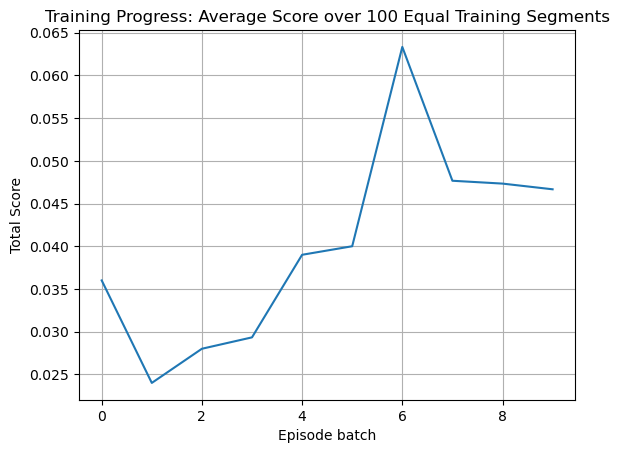

In [16]:
plt.plot(np.mean(np.array_split(agent.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [10]:
agent.save_gif(save_path="cnn_dqn_checkpoints/ep_100000.gif")

Saved gameplay GIF to: cnn_dqn_checkpoints/ep_100000.gif


## MLP

CNN does not really work wonder. My guess is that CNN strives with high-definition photo, and the binary board here is just too simple for a CNN model to learn efficiently. A simple MLP with some handcrafted feature mat work better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from mlp_dqn import MLPAgent

In [2]:
print("CUDA available:", torch.cuda.is_available())
print("Torch CUDA version:", torch.version.cuda)

CUDA available: True
Torch CUDA version: 12.6


### Training (Start fresh)

In [2]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.9  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 #1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 10_000  # size of memory to sample batches from
BATCH_SIZE = 32  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 10  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "feature_mlp_checkpoints/latest.pth"

Using: cuda


In [3]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = MLPAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)

In [4]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

MLP | mu_100=22.1 | epsilon=0.10: 100%|██████████| 5000/5000 [11:35<00:00,  7.19it/s]


In [5]:
agent.save_agent(SAVE_PATH)

### Training (Start from agent)

In [12]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

# bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.9  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 #1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 10_000  # size of memory to sample batches from
BATCH_SIZE = 256  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 32  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "feature_mlp_checkpoints/latest.pth"
LOAD_PATH = "feature_mlp_checkpoints/latest.pth"

Using: cuda


In [13]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = MLPAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)

In [14]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

MLP | mu_100=14.8 | epsilon=0.01: 100%|██████████| 5000/5000 [10:36<00:00,  7.86it/s]


In [17]:
agent.save_agent(SAVE_PATH)

### Analysis

In [6]:
len(agent.rewards)

5000

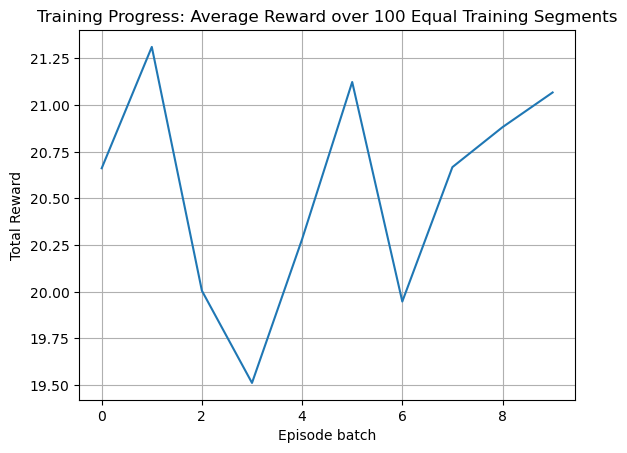

In [10]:
plt.plot(np.mean(np.array_split(agent.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

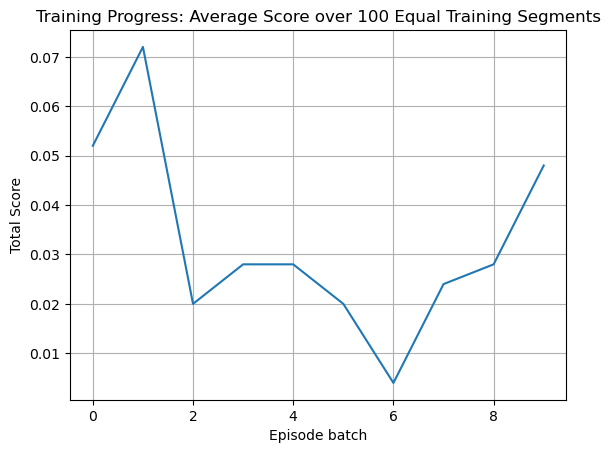

In [9]:
plt.plot(np.mean(np.array_split(agent.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [11]:
agent.save_gif(save_path="feature_mlp_checkpoints/ep_5000.gif")

Saved gameplay GIF to: feature_mlp_checkpoints/ep_5000.gif


## MLP on V

Unfortunately, MLP still does not work wonder with few training. Feel like the dimenstionality of Q(s,a) is way too high. Perhaps we can just learn a V(s), and hand-craft a few features to represent s. We can provide the board with all possible next states for all action in the current state. The agent does not have to learn the effect of its action. It knows the effect of the action (i.e., the transition), we just evaluate outcomes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from value_dqn import ValueDQNAgent

### Training (Start fresh)

In [2]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest.pth"

Using: cuda


In [3]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)

In [4]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN | mu_100=241.4 | epsilon=0.10: 100%|██████████| 5000/5000 [28:20<00:00,  2.94it/s]


In [9]:
agent.save_agent(SAVE_PATH)

### Training (Start from agent)

In [7]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 3_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest.pth"
LOAD_PATH = "value_dqn_checkpoints/latest.pth"

Using: cuda


In [ ]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)

In [8]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN:   0%|          | 0/3000 [00:00<?, ?it/s]

Value-DQN | mu_100=190.0 | epsilon=0.10: 100%|██████████| 3000/3000 [54:37<00:00,  1.09s/it] 


In [1]:
agent.save_agent(SAVE_PATH)

NameError: name 'agent' is not defined

### Analysis

In [9]:
len(agent.rewards)

8000

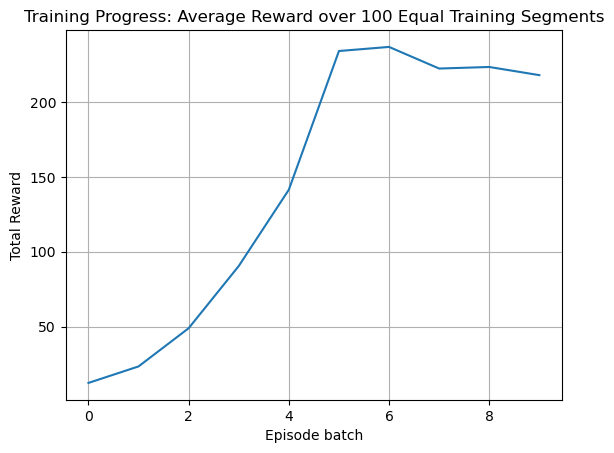

In [10]:
plt.plot(np.mean(np.array_split(agent.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

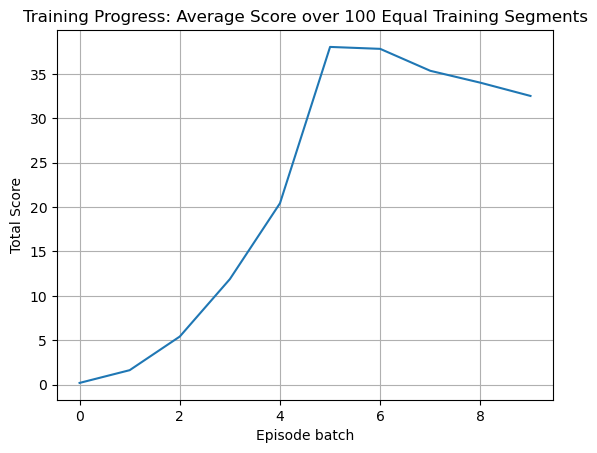

In [11]:
plt.plot(np.mean(np.array_split(agent.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [12]:
agent.save_gif("value_dqn_checkpoints/ep_8000.gif")

Saved gameplay GIF to: value_dqn_checkpoints/ep_8000.gif
